Project Title Concrete Compressive Strength Prediction
Technologies Machine Learning Technology
Domain Infra
Project Difficulties level Intermediate

## Problem Statement:
The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. The strength of the concrete
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
strength, which is a long period. So, what will we do now? We can save a lot of time and
effort by using Data Science to estimate how much quantity of which raw material we
need for acceptable compressive strength.



Thanks to AHIALE DARLINGTON
for this beautiful dataset Concrete Compressive Strength DataSet.


## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the compressive
strength of the concrete.

## Project Evaluation metrics:
Code:
• You are supposed to write a code in a modular fashion
• Safe: It can be used without causing harm.
• Testable: It can be tested at the code level.
• Maintainable: It can be maintained, even as your codebase grows.
• Portable: It works the same in every environment (operating system)
• You have to maintain your code on GitHub.
• You have to keep your GitHub repo public so that anyone can check your code.
• Proper readme file you have to maintain for any project development.
• You should include basic workflow and execution of the entire project in the readme
file on GitHub
• Follow the coding standards: https://www.python.org/dev/peps/pep-0008/


In [1]:
!pip install matplotlib
!pip install seaborn
!pip install plotly


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


In [2]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings("ignore")
import math 
%matplotlib inline  

In [3]:
#using dataset
df=pd.read_csv("concrete_data.csv")

In [4]:
df.head()  #head for dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.describe() #describe numerical dataset.

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.shape

(1030, 9)

In [7]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


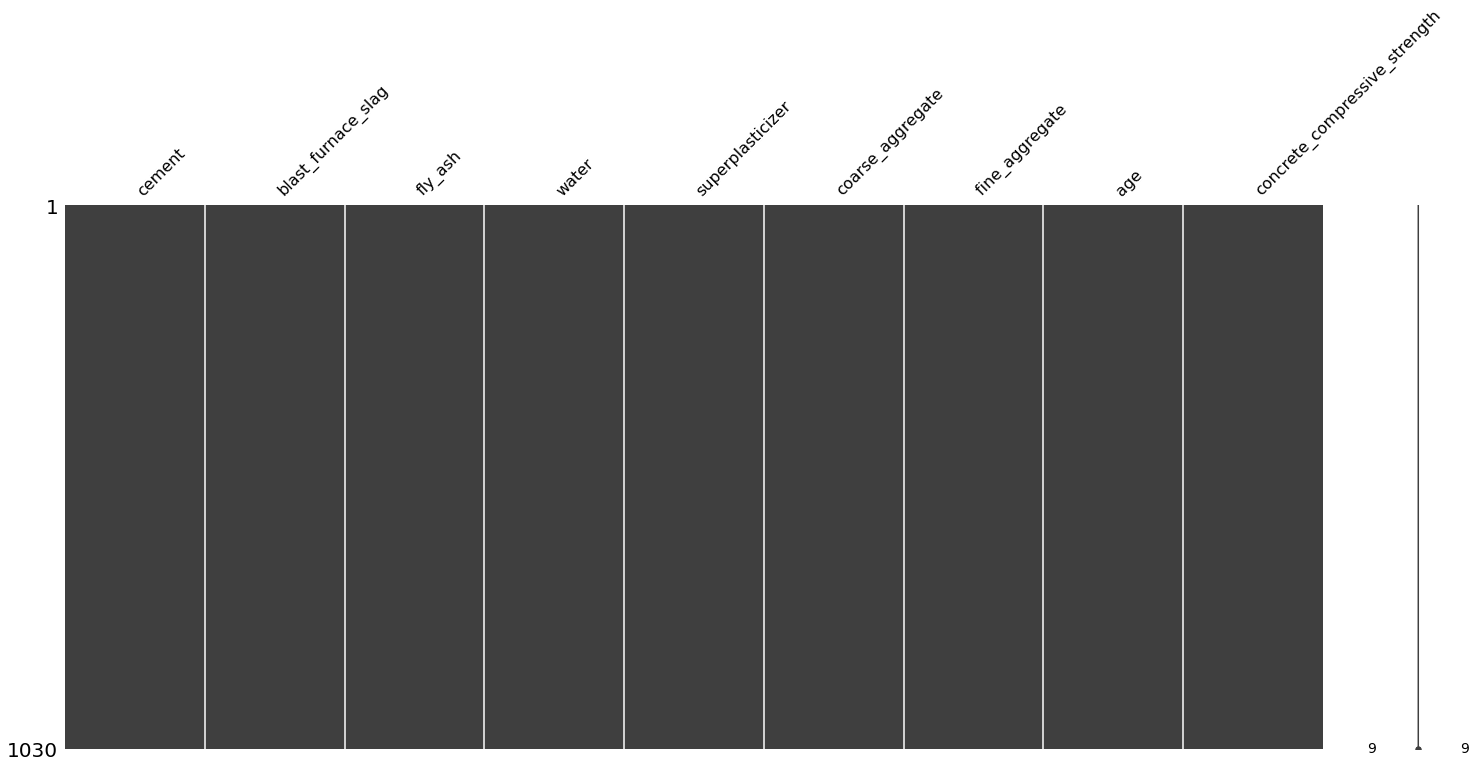

In [8]:
!pip install missingno
import missingno as ms
ms.matrix(df)  #datasets has null value for not using missingno module
plt.show()

The dataset has nothing null in it 

In [9]:
df_=df.drop(columns=["concrete_compressive_strength"])

In [10]:
df["concrete_compressive_strength"]

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [11]:
df_columns=df_.keys()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler  #standarize the dataset to make it more useable.
scaler =  Pipeline([('Normalizer', Normalizer()), 
#                    ('log-transformation', math.logp())
                   ])
df_=scaler.fit_transform(df_);
df_=np.array(df_);df_

array([[0.39624448, 0.        , 0.        , ..., 0.76313751, 0.49603938,
        0.02054601],
       [0.39293409, 0.        , 0.        , ..., 0.7676768 , 0.49189527,
        0.02037436],
       [0.27357162, 0.11724498, 0.        , ..., 0.76682331, 0.48872645,
        0.22214838],
       ...,
       [0.12141129, 0.11397127, 0.08878967, ..., 0.72961238, 0.63771588,
        0.02289237],
       [0.1222549 , 0.14346317, 0.        , ..., 0.76042395, 0.60620297,
        0.02151563],
       [0.21646863, 0.08338481, 0.06496548, ..., 0.71727531, 0.63181625,
        0.02323159]])

In [12]:
df1=pd.DataFrame(df_,columns=df_columns)
# df1= np.log1p(df1)
df1["concrete_compressive_strength"]=df["concrete_compressive_strength"]
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.396244,0.000000,0.000000,0.118873,0.001834,0.763138,0.496039,0.020546,79.99
1,0.392934,0.000000,0.000000,0.117880,0.001819,0.767677,0.491895,0.020374,61.89
2,0.273572,0.117245,0.000000,0.187592,0.000000,0.766823,0.488726,0.222148,40.27
3,0.268151,0.114922,0.000000,0.183875,0.000000,0.751630,0.479043,0.294361,41.05
4,0.145536,0.097024,0.000000,0.140700,0.000000,0.716983,0.604936,0.263812,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.227316,0.095400,0.074264,0.147706,0.007320,0.715584,0.631862,0.023028,44.28
1026,0.264217,0.000000,0.094797,0.160728,0.008528,0.670711,0.667021,0.022961,31.18
1027,0.121411,0.113971,0.088790,0.157549,0.004987,0.729612,0.637716,0.022892,23.70
1028,0.122255,0.143463,0.000000,0.134934,0.008683,0.760424,0.606203,0.021516,32.77


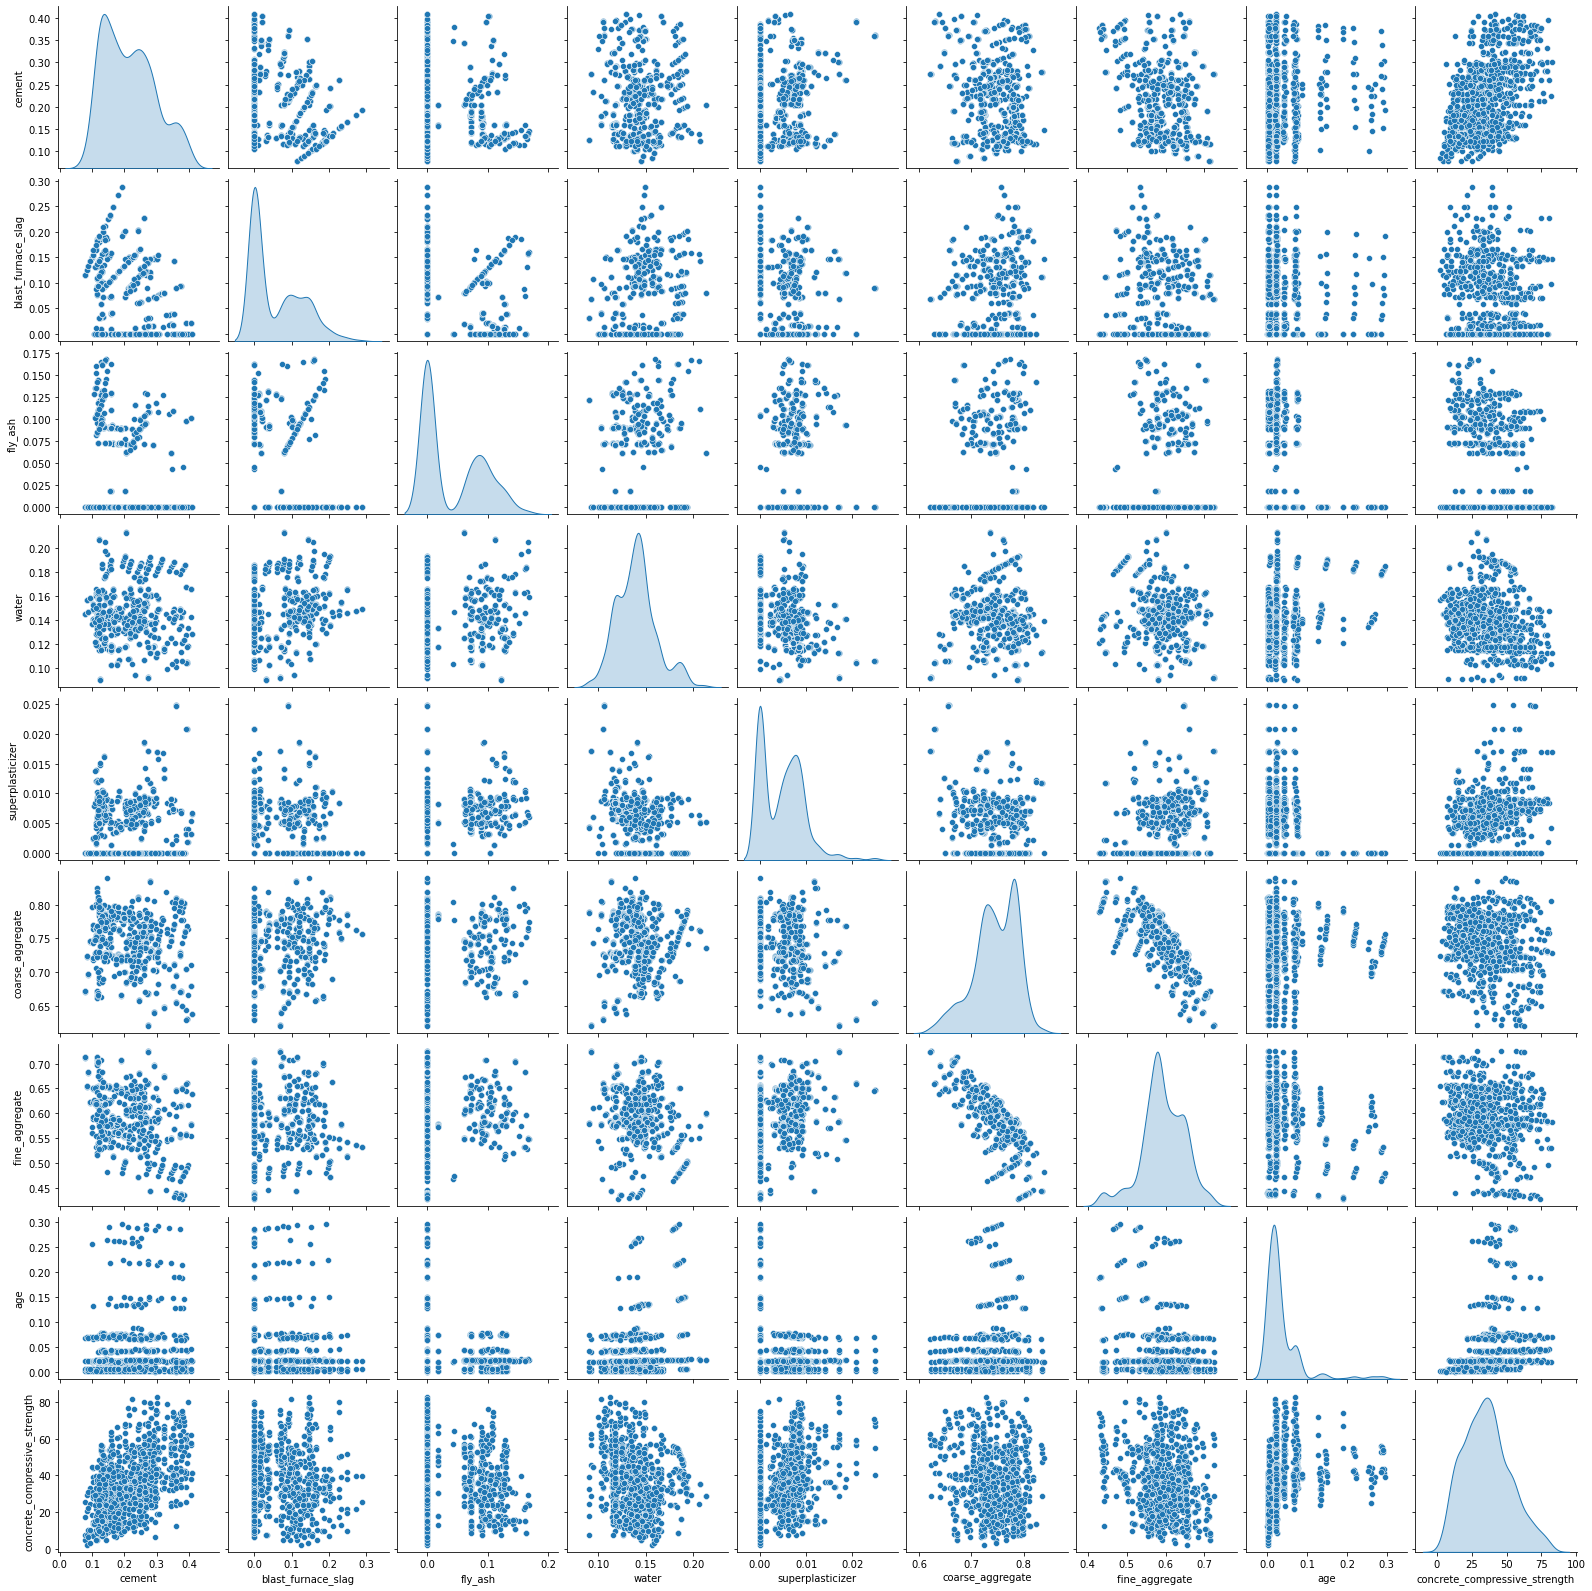

In [13]:
sns.pairplot(data=df1, diag_kind='kde')

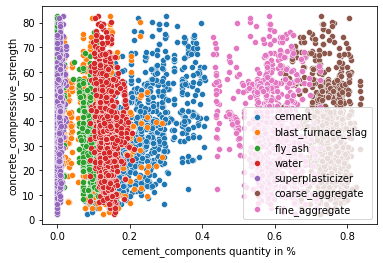

In [14]:
list_=[i for i in df.iloc[:,:-1]]
for i in range(0,7):
    sns.scatterplot(x=df1[list_[i]],y=df1["concrete_compressive_strength"])
    plt.xlabel("cement_components quantity in %")
    plt.legend(list_,loc='lower right')

<AxesSubplot:xlabel='cement', ylabel='concrete_compressive_strength'>

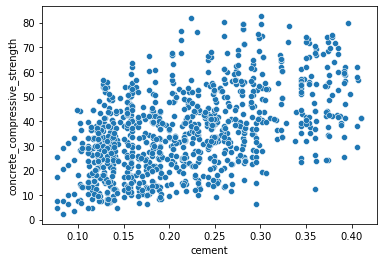

In [15]:
sns.scatterplot(x=df1["cement"],y=df1["concrete_compressive_strength"])

In [16]:
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.396244,0.000000,0.000000,0.118873,0.001834,0.763138,0.496039,0.020546,79.99
1,0.392934,0.000000,0.000000,0.117880,0.001819,0.767677,0.491895,0.020374,61.89
2,0.273572,0.117245,0.000000,0.187592,0.000000,0.766823,0.488726,0.222148,40.27
3,0.268151,0.114922,0.000000,0.183875,0.000000,0.751630,0.479043,0.294361,41.05
4,0.145536,0.097024,0.000000,0.140700,0.000000,0.716983,0.604936,0.263812,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.227316,0.095400,0.074264,0.147706,0.007320,0.715584,0.631862,0.023028,44.28
1026,0.264217,0.000000,0.094797,0.160728,0.008528,0.670711,0.667021,0.022961,31.18
1027,0.121411,0.113971,0.088790,0.157549,0.004987,0.729612,0.637716,0.022892,23.70
1028,0.122255,0.143463,0.000000,0.134934,0.008683,0.760424,0.606203,0.021516,32.77


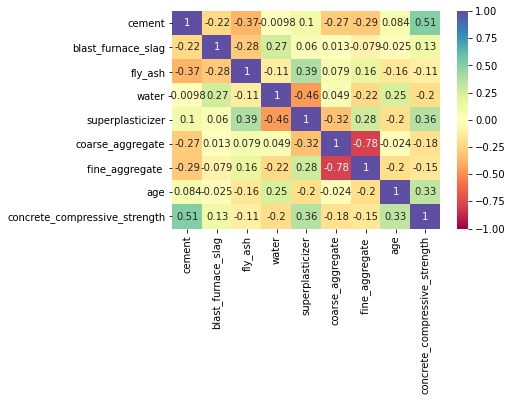

In [17]:
corr = df1.corr()
sns.heatmap(corr,cmap="Spectral",annot=True,vmax=1,vmin=-1)
plt.show()

Doesn't show clear picture.
coarse aggregrates greatly affect the compressive strength negativaly 

# feature importance 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["concrete_compressive_strength"])
y = df1.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

In [19]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: concrete_compressive_strength, Length: 258, dtype: float64

In [20]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

In [21]:
sort = rf.feature_importances_.argsort()

In [22]:
sort

array([5, 2, 6, 4, 1, 3, 0, 7], dtype=int64)

Text(0.5, 0, 'Feature Importance')

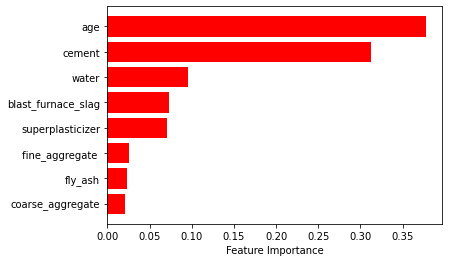

In [23]:
plt.barh(df1.columns[sort], rf.feature_importances_[sort],color="red")
plt.xlabel("Feature Importance")

In [24]:
## fINDING THE BEST FEATURES 

In [25]:
!pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


In [26]:
#just to check the adjusted r -squared and r-squared p test etc
import statsmodels.api as sm

# performing the regression
# and fitting the model
result = sm.OLS(df1["concrete_compressive_strength"], sm.add_constant(df1.iloc[:,:-1])).fit()
 
# printing the summary table
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.664
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     252.6
Date:                           Wed, 07 Dec 2022   Prob (F-statistic):          6.29e-236
Time:                                   23:06:10   Log-Likelihood:                -3799.0
No. Observations:                           1030   AIC:                             7616.
Df Residuals:                               1021   BIC:                             7661.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [27]:
# !pip install lightgbm
# !pip install xgboost

## Check other models 

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.linear_model import LogisticRegression

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2),round(mean_squared_error(y_test,yhat),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(),DecisionTreeRegressor(),LinearRegression(),
     KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(ExtraTreeRegressor(), random_state=42),
     Ridge(alpha=0.1,normalize=True,max_iter=1e5),GaussianProcessRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE','MSE'])

,Model,Score,MAE,RMSE,MSE
0,GradientBoostingRegressor,0.872,4.27,5.88,34.62
1,LGBMRegressor,0.892,3.36,5.41,29.31
2,XGBRFRegressor,0.824,5.12,6.91,47.75
3,DecisionTreeRegressor,0.805,4.79,7.27,52.88
4,LinearRegression,0.671,7.33,9.43,89.00
5,KNeighborsRegressor,0.716,6.83,8.76,76.80
6,RandomForestRegressor,0.884,3.93,5.61,31.50
7,BaggingRegressor,0.861,4.32,6.14,37.76
8,Ridge,0.594,8.41,10.49,110.00
9,GaussianProcessRegressor,0.834,4.60,6.71,44.99


Looks like random forest and light gbm regressor works best.

## Choose the best model Using Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

import xgboost as xg
param_grid = {'n_estimators': [1000],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.25, 0.2],
              'max_depth' :[0,5,10,20], 
              'eta':[0.1,0.2,0.5], 'subsample':[0.5,0.7], 'colsample_bytree':[0.5,0.8],
              "learning_rate":[0.1,0.2,0.5]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model)
#                                         transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
ypred = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'colsample_bytree': 0.8, 'eta': 0.1, 'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 1000, 'reg_lambda': 0.2, 'subsample': 0.7}


(0.9098481324887847, 3.1906391588165697, 4.941615339152954)

In [30]:
best_model

LGBMRegressor(max_depth=20, n_estimators=1000, reg_lambda=0.2)

In [31]:
best_params

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'learning_rate': 0.5,
 'max_depth': 20,
 'n_estimators': 1000,
 'reg_lambda': 0.2,
 'subsample': 0.7}

In [32]:
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=42)
regr = LGBMRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8,learning_rate=.1,reg_lambda=0.2)
#best_model
regr.fit(X_train, y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


LGBMRegressor(colsample_bytree=0.8, eta=0.1, max_depth=20, n_estimators=1000,
              reg_lambda=0.2, subsample=0.7)

In [33]:
y_pred=regr.predict(X_test);y_pred

array([53.34887734, 39.43235961, 76.37623394, 35.27790472, 10.99048232,
       45.27745286, 24.79265707, 51.81585737, 32.75211926, 44.89312136,
       38.40100177, 11.84360681, 40.73126859, 47.96752783, 23.58800849,
       24.14710816, 39.81008396, 19.20612159, 37.24810503, 34.37521431,
       33.80203041, 40.33618849, 48.37968407,  8.19155006, 32.37477662,
       38.31847098,  6.96309848, 43.21795604, 53.55513589, 14.6349889 ,
       53.78758926, 36.83965525, 49.30032844, 58.22367907, 18.01393026,
       35.30628124, 32.9044962 , 42.30925184, 13.06335044, 50.00087171,
       13.3056119 ,  6.05802639, 34.89371098, 44.42642803, 13.70856279,
       65.61508908, 46.89197321, 38.7354274 , 23.55130392,  4.56679376,
       56.61647869, 42.57972486, 26.92650438, 15.04789703, 42.00110053,
       31.73935071, 28.24267965, 12.32611317, 30.48152044, 20.52659355,
       42.02821129, 13.51199799, 39.15808622, 50.63626215, 32.3606777 ,
       16.82199326, 34.71575411, 13.20848023, 32.49251564, 24.02

In [34]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: concrete_compressive_strength, Length: 258, dtype: float64

In [35]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",round(r2_score(y_test, y_pred), 4)*100)

MAE: 3.1013174326657187
MSE: 23.312466209060776
RMSE: 4.8282984796987
r2_score 91.39


## Great 91 % r2 score acheived ............................

In [36]:
# save the model to disk

import pickle

filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

scaler_ = "scaler.pkl"
pickle.dump(scaler, open(scaler_, 'wb'))

In [37]:
# cement	blast_furnace_slag	fly_ash	water	superplasticizer	
# coarse_aggregate	fine_aggregate	age	concrete_compressive_strength

In [38]:
## ALL THINGS BELOW THIS ARE FOR STREAMLIT APP

In [ ]:
pickled_model = pickle.load(open('finalized_model.sav', 'rb'))
pickled_scaler=pickle.load(open('scaler.pkl', 'rb'))

In [47]:
# pickled_scaler.fit_transform([cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age])
# scaler_list=scaler.fit_transform([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

[[0.1455363968083047,
  0.09702426453886982,
  0.0,
  0.14069983981467526,
  0.0,
  0.7169829337222826,
  0.6049360300365335,
  0.2638121996525161]]

In [39]:
import streamlit as st
#Caching the model for faster loading
# @st.cache

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
def predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age):
    
    #Predicting the price of the carat
    scaler_list=pickled_scaler.fit_transform([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

    prediction = pickled_model.predict(pd.DataFrame(scaler_list,columns=["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                                                         "coarse_aggregate", "fine_aggregate", "age"]))    
    return prediction

In [ ]:
st.title('Compressive Strength Concrete Predictor')
st.image("""https://civildigital.com/wp-content/uploads/2016/07/Hydraulic-Compression-Testing-Machine.jpg""")
st.header('Enter the Components of Concrete') 

In [ ]:
cement = st.number_input('cement:', min_value=0.1, max_value=10.0, value=1.0)

blast_furnace_slag = st.number_input('blast_furnace_slag:', min_value=0.1, max_value=100.0, value=1.0)

fly_ash = st.number_input('fly_ash:', min_value=0.1, max_value=100.0, value=1.0)

water = st.number_input('water:', min_value=0.1, max_value=100.0, value=1.0)

superplasticizer = st.number_input('superplasticizer:', min_value=0.1, max_value=100.0, value=1.0)

coarse_aggregate = st.number_input('Coarse_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

fine_aggregate = st.number_input('Fine_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

age = st.slider('Age in years:', min_value=0.5, max_value=150.0, value=1.0)

In [ ]:
if st.button('Componets of Concrete'):
    price = predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age )
    st.success(f'The predicted compressive strength of concrete is ${concrete_compressive_strength:.2f}')